In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import stats
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score , accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("C:/Users/Shahbaz Baig/Desktop/titanic_toy.csv")

In [4]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


<Axes: >

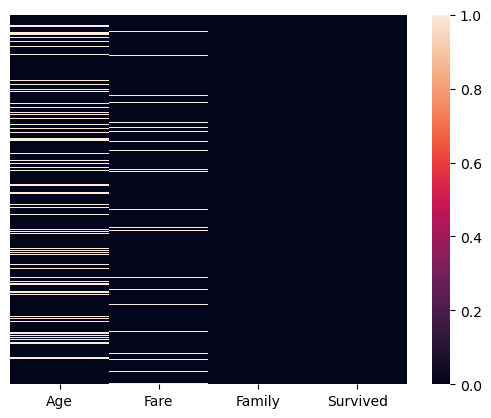

In [5]:
sns.heatmap(df.isnull(),yticklabels = False)

In [6]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [7]:
x = df.drop('Survived' , axis = 1)
y = df['Survived']

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 72 , test_size = 0.2)

In [9]:
x_train
x_test

,Age,Fare,Family
9,14.00,30.0708,1
450,36.00,27.7500,3
306,NaN,110.8833,0
179,36.00,0.0000,0
346,40.00,13.0000,0
...,...,...,...
827,1.00,37.0042,2
755,0.67,14.5000,2
849,NaN,89.1042,1
101,NaN,7.8958,0


In [10]:
age_median = x_train['Age'].median()
age_mean = x_train['Age'].mean()
fare_median = x_train['Fare'].median()
fare_mean = x_train['Fare'].mean()

In [11]:
fare_median

14.0

In [12]:
x_train['Age_mean'] = x_train['Age'].fillna(age_mean)
x_train['Age_median'] = x_train['Age'].fillna(age_median)
x_train['Fare_mean'] = x_train['Fare'].fillna(fare_mean)
x_train['Fare_median'] = x_train['Fare'].fillna(fare_median)

In [13]:
x_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
292,36.0,12.8750,0,36.000000,36.0,12.8750,12.8750
674,NaN,0.0000,0,29.772251,28.0,0.0000,0.0000
121,NaN,8.0500,0,29.772251,28.0,8.0500,8.0500
6,54.0,51.8625,0,54.000000,54.0,51.8625,51.8625
780,13.0,7.2292,0,13.000000,13.0,7.2292,7.2292
...,...,...,...,...,...,...,...
869,4.0,11.1333,2,4.000000,4.0,11.1333,11.1333
74,32.0,56.4958,0,32.000000,32.0,56.4958,56.4958
46,NaN,15.5000,1,29.772251,28.0,15.5000,15.5000
787,8.0,29.1250,5,8.000000,8.0,29.1250,29.1250


# **Checking the Variance**

In [15]:
print("original Variance of age :",x_train['Age'].var())
print("Mean Variance of age :",x_train['Age_mean'].var())
print("Median Variance of age :",x_train['Age_median'].var())

original Variance of age : 198.79100803463592
Mean Variance of age : 159.92750576063546
Median Variance of age : 160.42166900472512


# **Checking the distribution of different columns**

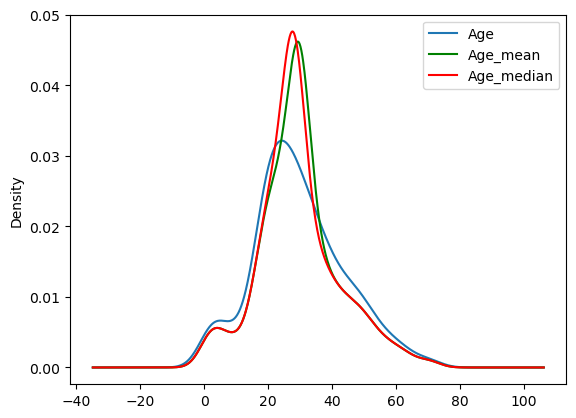

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Age'].plot(kind = 'kde' , ax = ax)
x_train['Age_mean'].plot(kind = 'kde' , ax = ax , color = 'green')
x_train['Age_median'].plot(kind = 'kde' , ax = ax , color = 'red')

# for adding legends in this graph
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')
plt.show()   # so you see the mean and median are more towards mean centeric



In [18]:
x_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,198.791008,79.874537,-6.296585,198.791008,198.791008,75.969422,75.003878
Fare,79.874537,2312.143945,14.660954,64.092197,67.533719,2312.143945,2312.143945
Family,-6.296585,14.660954,2.480436,-5.065607,-4.991703,13.980488,14.214724
Age_mean,198.791008,64.092197,-5.065607,159.927506,159.927506,61.117454,60.340672
Age_median,198.791008,67.533719,-4.991703,159.927506,160.421669,64.399243,63.603416
Fare_mean,75.969422,2312.143945,13.980488,61.117454,64.399243,2204.829247,2204.829247
Fare_median,75.003878,2312.143945,14.214724,60.340672,63.603416,2204.829247,2218.031105


In [19]:
x_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.110528,-0.297343,1.000000,1.000000,0.108811,0.107054
Fare,0.110528,1.000000,0.190953,0.104357,0.109805,1.000000,1.000000
Family,-0.297343,0.190953,1.000000,-0.254335,-0.250238,0.189047,0.191642
Age_mean,1.000000,0.104357,-0.254335,1.000000,0.998459,0.102924,0.101313
Age_median,1.000000,0.109805,-0.250238,0.998459,1.000000,0.108283,0.106626
Fare_mean,0.108811,1.000000,0.189047,0.102924,0.108283,1.000000,0.997020
Fare_median,0.107054,1.000000,0.191642,0.101313,0.106626,0.997020,1.000000


# **Boxplot for Outlier Detection**

<Axes: >

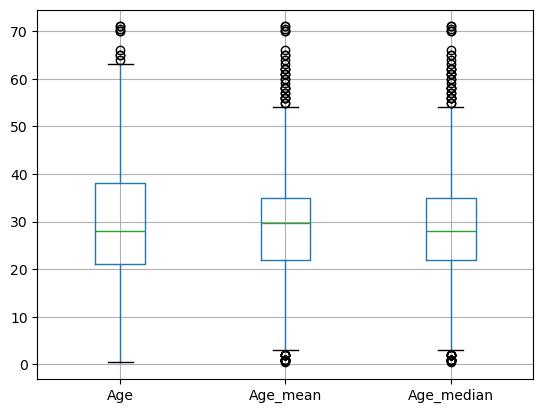

In [21]:
x_train[['Age','Age_mean','Age_median']].boxplot()  # so our outliers increases by mean and median imputation

# **Using Sklearn**

In [73]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 72 , test_size = 0.2)

In [24]:
x_train


,Age,Fare,Family
292,36.0,12.8750,0
674,NaN,0.0000,0
121,NaN,8.0500,0
6,54.0,51.8625,0
780,13.0,7.2292,0
...,...,...,...
869,4.0,11.1333,2
74,32.0,56.4958,0
46,NaN,15.5000,1
787,8.0,29.1250,5


In [25]:
impute1 = SimpleImputer(strategy = 'median')
impute2 = SimpleImputer(strategy = 'mean')

In [26]:
impute1

SimpleImputer(strategy='median')

In [27]:
trf = ColumnTransformer([
    ('impute1' , impute1 ,['Age']),
    ('impute2', impute2 , ['Fare'])
],remainder = 'passthrough')

In [28]:
trf


ColumnTransformer(remainder='passthrough',
                  transformers=[('impute1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('impute2', SimpleImputer(), ['Fare'])])

In [29]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('impute2', SimpleImputer(), ['Fare'])])

In [30]:
trf.named_transformers_['impute1'].statistics_   # resutlt is the median value of age

array([28.])

In [31]:
trf.named_transformers_['impute2'].statistics_ # result is the mean value of Fare

array([31.27032342])

In [32]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [33]:
x_train

array([[36.   , 12.875,  0.   ],
       [28.   ,  0.   ,  0.   ],
       [28.   ,  8.05 ,  0.   ],
       ...,
       [28.   , 15.5  ,  1.   ],
       [ 8.   , 29.125,  5.   ],
       [33.   , 27.75 ,  3.   ]])

In [34]:
x_train = pd.DataFrame(x_train)

In [35]:
x_train.columns = ['Age','Fare' , 'Family']

In [36]:
x_train

,Age,Fare,Family
0,36.0,12.8750,0.0
1,28.0,0.0000,0.0
2,28.0,8.0500,0.0
3,54.0,51.8625,0.0
4,13.0,7.2292,0.0
...,...,...,...
707,4.0,11.1333,2.0
708,32.0,56.4958,0.0
709,28.0,15.5000,1.0
710,8.0,29.1250,5.0


# **Arbitrary Value Imputation**

# DO YOUR OWN SELF

In [39]:
# double peak is known as Bimodal distribution

In [40]:
x_train['Age'].mean()+3*x_train['Age'].std()  # this is basically outlier

67.4235668576768

<Axes: >

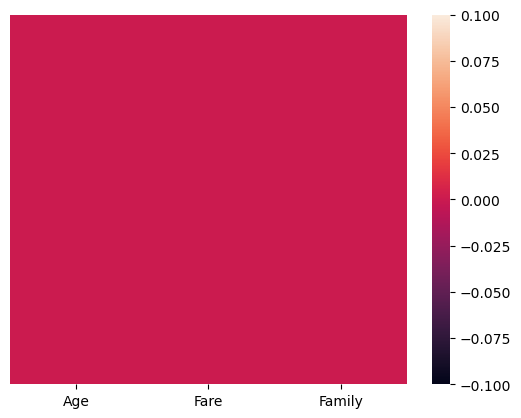

In [41]:
sns.heatmap(x_train.isnull(),yticklabels = False)


In [42]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Fare_999'] = x_train['Fare'].fillna(999)

In [43]:
x_train

,Age,Fare,Family,Age_99,Fare_999
0,36.0,12.8750,0.0,36.0,12.8750
1,28.0,0.0000,0.0,28.0,0.0000
2,28.0,8.0500,0.0,28.0,8.0500
3,54.0,51.8625,0.0,54.0,51.8625
4,13.0,7.2292,0.0,13.0,7.2292
...,...,...,...,...,...
707,4.0,11.1333,2.0,4.0,11.1333
708,32.0,56.4958,0.0,32.0,56.4958
709,28.0,15.5000,1.0,28.0,15.5000
710,8.0,29.1250,5.0,8.0,29.1250


# Variance

In [45]:
print("Variance of age columns",x_train['Age'].var())
print("Variance of age_99 columns",x_train['Age_99'].var())

Variance of age columns 160.42166900472512
Variance of age_99 columns 160.42166900472512


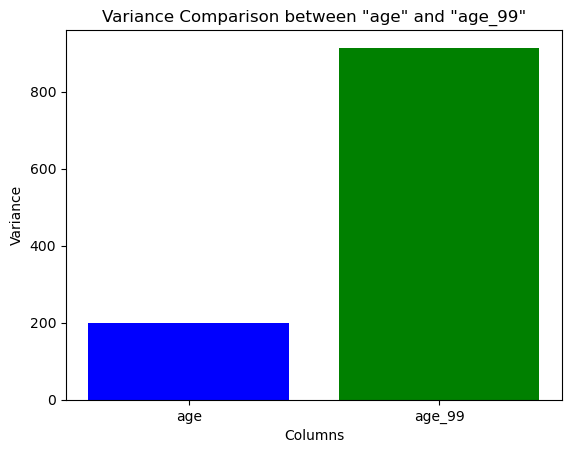

In [46]:
import matplotlib.pyplot as plt

# Variance values
variances = {
    'age': 198.79100803463592,
    'age_99': 913.9429556875124
}

# Create the plot
plt.bar(variances.keys(), variances.values(), color=['blue', 'green'])

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.title('Variance Comparison between "age" and "age_99"')

# Display the plot
plt.show()


In [47]:
x_train.cov()

,Age,Fare,Family,Age_99,Fare_999
Age,160.421669,64.399243,-4.991703,160.421669,64.399243
Fare,64.399243,2204.829247,13.980488,64.399243,2204.829247
Family,-4.991703,13.980488,2.480436,-4.991703,13.980488
Age_99,160.421669,64.399243,-4.991703,160.421669,64.399243
Fare_999,64.399243,2204.829247,13.980488,64.399243,2204.829247


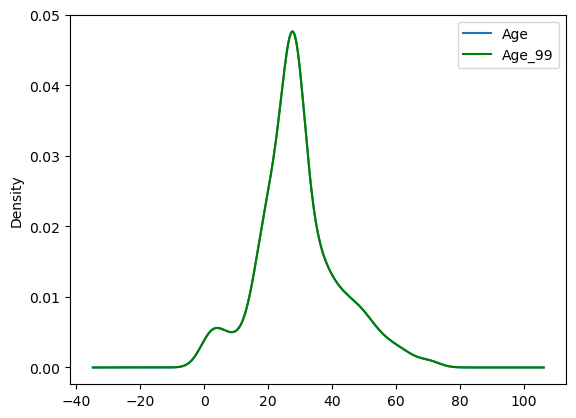

In [48]:
# now draw the distribution between columns
fig = plt.figure()
ax=fig.add_subplot(111)
x_train['Age'].plot(kind = 'kde' , ax=ax)
x_train['Age_99'].plot(kind = 'kde' , ax = ax , color = 'green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels)
plt.show()



# **Using Sklearn**

In [77]:
imp1 = SimpleImputer(strategy='constant' , fill_value = 99)
imp2 = SimpleImputer(strategy='constant' , fill_value = -1)
trf = ColumnTransformer([
    ('imp1' , imp1 , ['Age']),
    ('imp2' , imp2 , ['Age']),
],remainder = 'passthrough')

In [79]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imp2',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Age'])])

In [81]:
trf.named_transformers_['imp1'].statistics_
# trf.named_transformers_['impute2'].statistics_

array([99.])

In [67]:
trf.named_transformers_['imp2'].statistics_

array([-1.])

In [83]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [75]:
x_train

,Age,Fare,Family
292,36.0,12.8750,0
674,NaN,0.0000,0
121,NaN,8.0500,0
6,54.0,51.8625,0
780,13.0,7.2292,0
...,...,...,...
869,4.0,11.1333,2
74,32.0,56.4958,0
46,NaN,15.5000,1
787,8.0,29.1250,5


In [89]:
x_train = pd.DataFrame(x_train)

In [93]:
x_train.columns = ['Age_99' , 'Age_-1' , 'Fare', "Family"]

In [97]:
x_train # so this method is very good for imputation technique


,Age_99,Age_-1,Fare,Family
0,36.0,36.0,12.8750,0.0
1,99.0,-1.0,0.0000,0.0
2,99.0,-1.0,8.0500,0.0
3,54.0,54.0,51.8625,0.0
4,13.0,13.0,7.2292,0.0
...,...,...,...,...
707,4.0,4.0,11.1333,2.0
708,32.0,32.0,56.4958,0.0
709,99.0,-1.0,15.5000,1.0
710,8.0,8.0,29.1250,5.0
